In [ ]:
import tensorflow as tf

In [ ]:
fashionMnist = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = fashionMnist

In [ ]:
x_train,y_train = x_train_full[:-5000],y_train_full[:-5000]
x_valid,y_valid = x_train_full[-5000:],y_train_full[-5000:]

In [ ]:
x_train,x_test,x_valid = x_train/255.0,x_test/255.0,x_valid/255.0

In [ ]:
classNames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
classNames[y_train[0]]

'Ankle boot'

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,
                    epochs=30,
                    validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6838 - loss: 0.9913 - val_accuracy: 0.8334 - val_loss: 0.5013
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8262 - loss: 0.5050 - val_accuracy: 0.8400 - val_loss: 0.4512
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8433 - loss: 0.4519 - val_accuracy: 0.8470 - val_loss: 0.4286
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8532 - loss: 0.4218 - val_accuracy: 0.8508 - val_loss: 0.4133
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8601 - loss: 0.3999 - val_accuracy: 0.8544 - val_loss: 0.4020
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8674 - loss: 0.3829 - val_accuracy: 0.8576 - val_loss: 0.3944
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8707 - loss: 0.3691 - val_accuracy: 0.8588 - val_loss: 0.3867
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8744 - loss: 0.3568

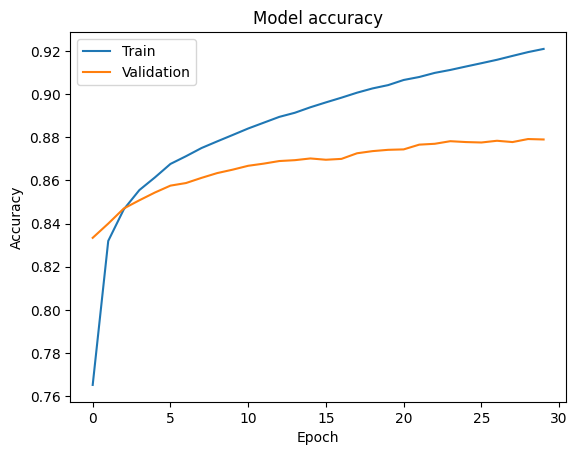

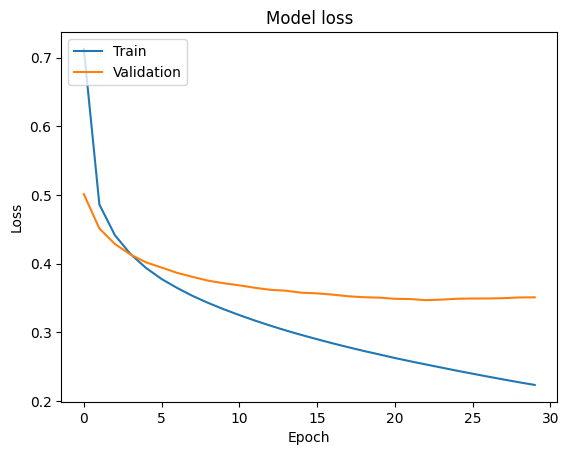

In [ ]:
# prompt: verileri analiz edelim

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8729 - loss: 0.3689


[0.3691823482513428, 0.8723000288009644]

In [ ]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.02, 0.  , 0.84],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_proba,axis=-1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(classNames)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')